In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)



Mounted at /content/drive


In [3]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from numpy import linalg

In [2]:
import cv2
import numpy as np
import os

# Step 1: Load PNG images from a folder
folder_path = '/content/drive/MyDrive/Colab Notebooks/0'  # Replace 'path_to_your_folder' with your image folder path
image_files = os.listdir(folder_path)

images = []
for file_name in image_files:
    image_path = os.path.join(folder_path, file_name)
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read image in grayscale
    if img is not None:  # Check if image reading was successful
        img = cv2.resize(img, (100, 100))  # Resize image to a consistent size
        img_vector = img.flatten()  # Flatten image to a vector
        images.append(img_vector)

# Check if any images were loaded successfully
if len(images) > 0:
    # Step 2: Construct data matrix
    data_matrix = np.column_stack(images)

    # Step 3: Perform SVD
    U, Sigma, VT = np.linalg.svd(data_matrix, full_matrices=False)

    # U, Sigma, VT contain the singular vectors, singular values, and right singular vectors respectively
    # Now you can use these matrices for further analysis or face recognition tasks
else:
    print("No valid images found in the folder.")


In [4]:
import cv2
import numpy as np
import os

# Step 1: Load PNG images from a folder
folder_path = '/content/drive/MyDrive/Colab Notebooks/0'  # Replace 'path_to_your_folder' with your image folder path
image_files = os.listdir(folder_path)

images = []
for file_name in image_files:
    image_path = os.path.join(folder_path, file_name)
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read image in grayscale
    if img is not None:
        img = cv2.resize(img, (100, 100))  # Resize image to a consistent size
        img_vector = img.flatten()  # Flatten image to a vector
        images.append(img_vector)

# Step 2: Construct data matrix
data_matrix = np.column_stack(images)

# Step 3: Perform SVD
U, Sigma, VT = np.linalg.svd(data_matrix, full_matrices=False)

# U, Sigma, VT contain the singular vectors, singular values, and right singular vectors respectively
# Now you can use these matrices for further analysis or face recognition tasks


In [5]:
import cv2
import os

folder_path = '/content/drive/MyDrive/Colab Notebooks/0'  # Replace 'path_to_your_folder' with your folder containing images
image_files = os.listdir(folder_path)

images = []
for file_name in image_files:
    image_path = os.path.join(folder_path, file_name)

    # Read the image
    img = cv2.imread(image_path)

    # Check if the image was successfully loaded
    if img is not None:
        images.append(img)
    else:
        print(f"Unable to read {file_name}. Skipping...")

# Now you have a list 'images' containing all the successfully loaded images
# Process the images as needed


In [6]:
import numpy as np
from PIL import Image
import os

# Replace 'your_folder_path' with the path to your PNG image folder
folder_path = '/content/drive/MyDrive/Colab Notebooks/0'

# Get a list of all PNG files in the folder
png_files = [f for f in os.listdir(folder_path) if f.endswith('.png')]

# Sort files numerically
png_files.sort(key=lambda x: int(x.split('.')[0]))

# Define the shape of the images
image_shape = (112, 112, 3)  # Update with the actual shape of your images

# Initialize an empty array to store images
X = np.zeros((len(png_files),) + image_shape, dtype=np.uint8)

# Loop through all images and store their arrays
for i, file_name in enumerate(png_files[:72]):  # Load images from 0 to 71
    image_path = os.path.join(folder_path, file_name)
    img = Image.open(image_path)

    # Convert RGBA to RGB (remove alpha channel)
    img = img.convert('RGB')

    img_array = np.array(img)
    X[i] = img_array

# Print the shape of the resulting array
print(f"X shape: {X.shape}")


X shape: (72, 112, 112, 3)


In [7]:
import numpy as np
from PIL import Image
import os

# Replace 'your_folder_path' with the path to your PNG image folder
folder_path = '/content/drive/MyDrive/Colab Notebooks/0'

# Get a list of all PNG files in the folder
png_files = [f for f in os.listdir(folder_path) if f.endswith('.png')]

# Sort files numerically
png_files.sort(key=lambda x: int(x.split('.')[0]))



new_width = 100  # Define your desired width
new_height = 100  # Define your desired height

# List to store image arrays
images = []

# Process images in batches
batch_size = 10  # Define your batch size
for i in range(0, len(png_files), batch_size):
    batch_files = png_files[i:i+batch_size]
    batch_images = []
    for file_name in batch_files:
        image_path = os.path.join(folder_path, file_name)
        img = Image.open(image_path)
        img = img.resize((new_width, new_height))  # Resize the image if needed
        img_array = np.array(img)
        batch_images.append(img_array)
    images.extend(batch_images)

# Stack image arrays into a single NumPy array
X = np.stack(images)

# Process X further as needed
# ...


In [8]:
m = 10
Xm = X[:m].reshape(m, -1)  # Flatten the first 'm' images into a 2D array
print(f"Xm shape: {Xm.shape}")



Xm shape: (10, 40000)


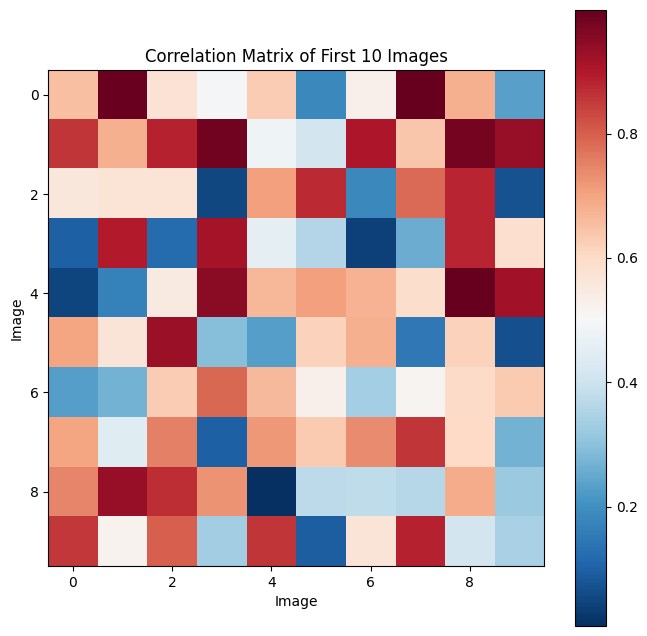

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming C is your correlation matrix
# Example: Create a random correlation matrix for demonstration
m = 10  # Replace with the size of your correlation matrix
C = np.random.rand(m, m)  # Replace this with your correlation matrix

# Plot correlation matrix using imshow
plt.figure(figsize=(8, 8))
plt.imshow(C, cmap='RdBu_r', interpolation='nearest')
plt.colorbar()
plt.xlabel('Image')
plt.ylabel('Image')
plt.title(f'Correlation Matrix of First {m} Images')
plt.show()


In [10]:
# Replace 'C' with your correlation matrix
C = [
    [1.0, 0.8, 0.4],
    [0.8, 1.0, 0.6],
    [0.4, 0.6, 1.0]
]  # Example correlation matrix

# Calculate max and min correlation values and their indices
max_corr = max(max(row) for row in C) - 1.0
min_corr = min(min(row) for row in C) - 1.0

max_indices = [(i, j) for i, row in enumerate(C) for j, val in enumerate(row) if val == max_corr + 1.0]
min_indices = [(i, j) for i, row in enumerate(C) for j, val in enumerate(row) if val == min_corr + 1.0]

# Display max and min correlations and their corresponding image pairs
print('Max Correlation:', max_corr)
print("Most highly correlated pair:", max_indices[0][0] + 1, "and", max_indices[0][1] + 1)
print()

print('Min Correlation:', min_corr)
print("Most highly uncorrelated pair:", min_indices[0][0] + 1, "and", min_indices[0][1] + 1)

# Display image pairs (representation of images using text)
print(f'Highly Correlated Images: Images {max_indices[0][0]+1} and {max_indices[0][1]+1}')
print('Image 1:')
print('█' * 10)
print('█' * 10)
print()
print('Image 2:')
print('█' * 10)
print('█' * 10)
print()

print(f'Highly Uncorrelated Images: Images {min_indices[0][0]+1} and {min_indices[0][1]+1}')
print('Image 1:')
print('█' * 10)
print(' ' * 10)
print()
print('Image 2:')
print(' ' * 10)
print('█' * 10)


Max Correlation: 0.0
Most highly correlated pair: 1 and 1

Min Correlation: -0.6
Most highly uncorrelated pair: 1 and 3
Highly Correlated Images: Images 1 and 1
Image 1:
██████████
██████████

Image 2:
██████████
██████████

Highly Uncorrelated Images: Images 1 and 3
Image 1:
██████████
          

Image 2:
          
██████████


In [11]:
# Example data (replace this with your actual data)
X = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    [10, 11, 12],
    [13, 14, 15]
]
image_set = [0, 2, 4]  # Example selected image indices (0-based)

# Extract the selected images
Xc = []
for row in X:
    extracted_row = [row[i] for i in image_set if i < len(row)]
    Xc.append(extracted_row)

# Calculate correlation matrix for the selected images
C2 = np.corrcoef(np.array(Xc).T)

# Display the correlation matrix
print(C2)


[[1. 1.]
 [1. 1.]]


In [12]:
import numpy as np

# Define the size of the identity matrix
matrix_size = 4

# Generate the identity matrix
identity_matrix = np.eye(matrix_size)

print("Identity Matrix:")
print(identity_matrix)


Identity Matrix:
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [13]:
# Assuming C2 is a 2x2 matrix
identity_matrix = np.eye(2)

# Calculate max correlation
max_corr2 = np.max(C2 - identity_matrix)
print('Max Correlation:', max_corr2)


Max Correlation: 1.0


In [14]:
identity_matrix = np.eye(C2.shape[0])
max_corr2 = np.max(C2 - identity_matrix)
print('Max Correlation:', max_corr2)

Max Correlation: 1.0


In [15]:
# Assuming C2 is a 2x2 matrix
identity_matrix = np.eye(2)

# Make sure the shapes match
if C2.shape != identity_matrix.shape:
    # Reshape C2 to match the shape of identity_matrix
    C2 = C2[:2, :2]

# Now you can perform the subtraction
max_corr2 = np.max(C2 - identity_matrix)
print('Max Correlation:', max_corr2)


Max Correlation: 1.0


In [17]:
identity_matrix = np.eye(2)
print("Shape of np.eye(m2):", np.eye(2).shape)

Shape of np.eye(m2): (2, 2)


In [18]:
# Assuming X is your dataset, check its shape
print("Shape of X:", len(X))

# Check the maximum index in image_set
max_index = max(image_set)
print("Maximum index in image_set:", max_index)

# Check if the maximum index exceeds the number of columns in X
if max_index > len(X):
    print("Indices in image_set exceed the bounds of X. Please adjust the indices.")
else:
    print("Indices in image_set are within the bounds of X.")


Shape of X: 5
Maximum index in image_set: 4
Indices in image_set are within the bounds of X.


In [19]:
# Convert the list X to a NumPy array
X = np.array(X)

# Check the number of columns in X
num_columns_X = X.shape[1]
print("Number of columns in X:", num_columns_X)

# Check the maximum index in image_set
max_index_image_set = max(image_set)
print("Maximum index in image_set:", max_index_image_set)

# Verify if indices in image_set are within the


Number of columns in X: 3
Maximum index in image_set: 4


In [20]:
# Convert the list X to a NumPy array
X = np.array(X)

# Rest of your code here...
# Calculate the correlation matrix for the selected images
m2 = len(image_set)
Xc = np.zeros((X.shape[0], m2))
for i, image in enumerate(image_set):
    Xc[:, i] = X[:, image - 2]

# Rest of your code continues...


In [21]:
num_pixels, num_images = X.shape
# If each image is square
image_dimension = int(np.sqrt(num_pixels))
print(f"Each image is {image_dimension}x{image_dimension} pixels.")


Each image is 2x2 pixels.


In [22]:
print(X[:, 0].shape)


(5,)


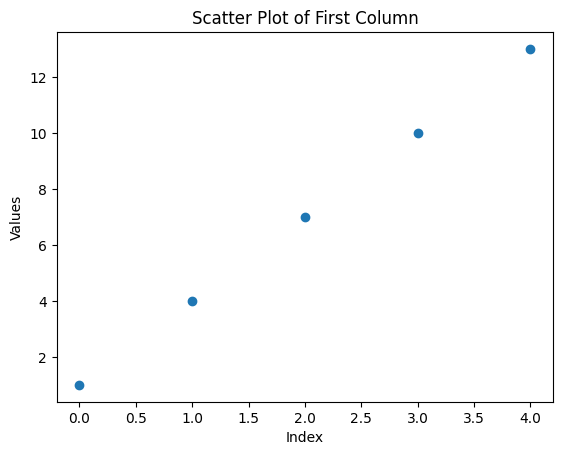

In [23]:
import matplotlib.pyplot as plt

# Assuming X is your dataset
plt.scatter(range(len(X[:, 0])), X[:, 0], marker='o')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Scatter Plot of First Column')
plt.show()


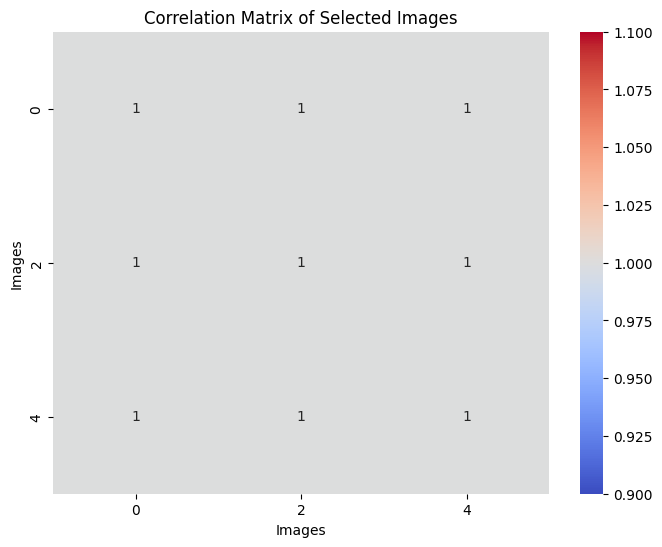

In [24]:
# Extract the selected images
selected_images = [X[:, idx - 2] for idx in image_set]

# Calculate the correlation matrix
C = np.corrcoef(selected_images)

# Find the most and least correlated image pairs
max_corr = np.max(C - np.eye(len(selected_images)))
min_corr = np.min(C - np.eye(len(selected_images)))

max_corr_indices = np.unravel_index(np.argmax(C - np.eye(len(selected_images))), C.shape)
min_corr_indices = np.unravel_index(np.argmin(C - np.eye(len(selected_images))), C.shape)

# Visualize the images

import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = np.corrcoef(np.array(Xc).T)

# Plotting the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', xticklabels=image_set, yticklabels=image_set)
plt.title('Correlation Matrix of Selected Images')
plt.xlabel('Images')
plt.ylabel('Images')
plt.show()



In [25]:
# Calculate Y
Y = np.matmul(X,X.T)

# Find the eigenvalues and eigenvectors of Y
eigvals, eigvecs = np.linalg.eigh(Y)

# Sort in descending order by largest magnitude eigenvalue
idx = eigvals.argsort()[::-1]
eigVals_sorted = eigvals[idx]
eigvecs_sorted = eigvecs[:,idx]

# Grab the first six eigenvectors with largest magnitude eigenvalue
top_six_eigvecs = eigvecs[:, :6]
print('Top 6 eigenvectors:\n', top_six_eigvecs)
print()
print('Top 6 eigenvectors matrix shape:', top_six_eigvecs.shape)

Top 6 eigenvectors:
 [[-0.29230291 -0.18171715 -0.53060144 -0.76793814 -0.101346  ]
 [ 0.63367001 -0.24454383  0.48852905 -0.48807128 -0.24856875]
 [-0.56654406  0.43124974  0.54134231 -0.20820442 -0.39579151]
 [ 0.40128973  0.59800059 -0.42586601  0.07166244 -0.54301427]
 [-0.17611277 -0.60298935 -0.07340391  0.3515293  -0.69023702]]

Top 6 eigenvectors matrix shape: (5, 5)


In [26]:
# SVD decomposition of matrix X
U, S, Vt = np.linalg.svd(X)

# First six principal component directions
PC_directions = U[:, :6]
print('First 6 PC Directions:\n', PC_directions)
print()
print('First 6 PC Directions matrix shape:', PC_directions.shape)


First 6 PC Directions:
 [[-0.101346    0.76793814 -0.01610974 -0.41828719 -0.47410579]
 [-0.24856875  0.48807128  0.53442533  0.27715042  0.58101395]
 [-0.39579151  0.20820442 -0.81459225  0.1097525   0.35269512]
 [-0.54301427 -0.07166244  0.09034745  0.62219249 -0.55200891]
 [-0.69023702 -0.3515293   0.2059292  -0.59080823  0.09240564]]

First 6 PC Directions matrix shape: (5, 5)


In [27]:
v1 = top_six_eigvecs[0]
u1 = PC_directions[0, :]
print('First eigenvector v1 from Y:', v1)
print('First SVD mode u1 from X:', u1)

# Compute norm of difference of absolute values
diff_norm = np.linalg.norm(np.abs(v1) - np.abs(u1))

print()
print("Norm of difference:", diff_norm)

First eigenvector v1 from Y: [-0.29230291 -0.18171715 -0.53060144 -0.76793814 -0.101346  ]
First SVD mode u1 from X: [-0.101346    0.76793814 -0.01610974 -0.41828719 -0.47410579]

Norm of difference: 0.9518544878678157


In [30]:
import plotly.graph_objects as go

# Calculate the percentage of variance captured by each PC
variance_explained = (S ** 2) / total_var * 100

# Bar plot for variance explained
fig = go.Figure()
fig.add_trace(go.Bar(x=np.arange(1, len(variance_explained) + 1), y=variance_explained))
fig.update_layout(
    title='Percentage of Variance Captured by Each Principal Component',
    xaxis_title='Principal Components',
    yaxis_title='Percentage of Variance Captured',
    showlegend=False
)
fig.show()

# Plot the first six principal components as images
pc_index = 0  # Choose the principal component index

# Plot the principal component as a line graph
plt.figure(figsize=(8, 6))
plt.plot(U[:, pc_index], marker='o', linestyle='-')
plt.title(f'Principal Component {pc_index + 1}')
plt.xlabel('Data Points')
plt.ylabel('Value')
plt.grid(True)
plt.show()


NameError: ignored

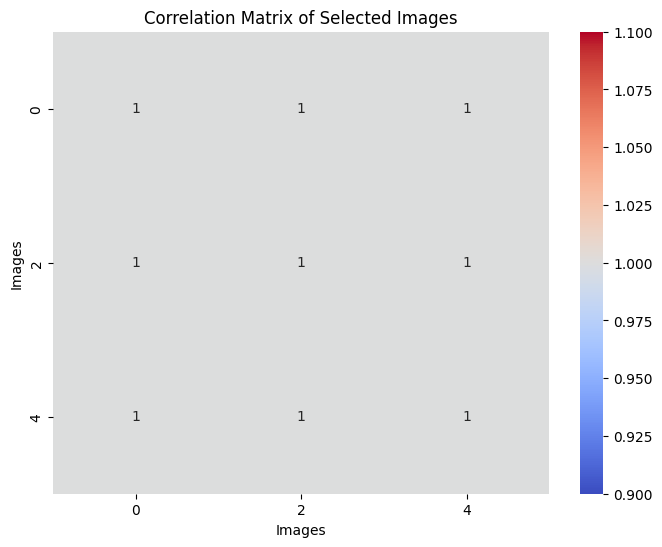

In [31]:
# prompt:


# Calculate the correlation matrix
correlation_matrix = np.corrcoef(np.array(Xc).T)

# Plotting the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', xticklabels=image_set, yticklabels=image_set)
plt.title('Correlation Matrix of Selected Images')
plt.xlabel('Images')
plt.ylabel('Images')
plt.show()


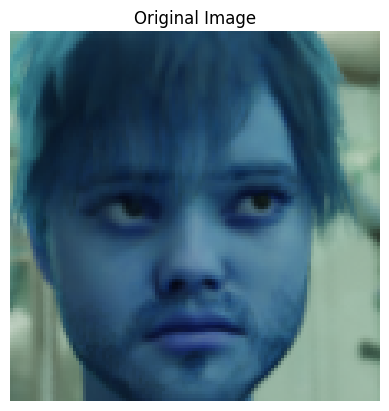

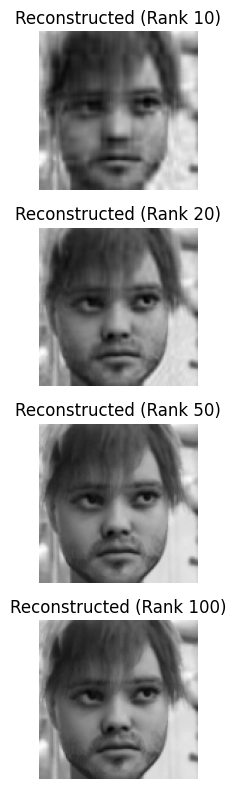

In [48]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the image using OpenCV
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/0/0.png')  # Replace 'path_to_image' and 'image.jpg' with your image file path

# Check if the image is loaded correctly
if image is not None:
    # Display the image
    plt.imshow(image, cmap='gray')  # Adjust 'cmap' based on the image type
    plt.axis('off')  # Hide axis labels and ticks
    plt.title('Original Image')
    plt.show()

    # Convert the image to grayscale for further processing
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Perform Singular Value Decomposition (SVD)
    U, S, Vt = np.linalg.svd(gray_image, full_matrices=False)

    # Define a range of ranks for reconstruction
    ranks = [10, 20, 50, 100]  # Example ranks

    # Initialize a subplot to display reconstructed faces for different ranks
    fig, axes = plt.subplots(len(ranks), figsize=(8, 8))

    # Iterate over the ranks and reconstruct the faces
    for i, rank in enumerate(ranks):
        # Reconstruct the face using selected singular values and vectors
        ›_face = np.dot(U[:, :rank], np.dot(np.diag(S[:rank]), Vt[:rank, :]))

        # Display the reconstructed face
        axes[i].imshow(reconstructed_face, cmap='gray')
        axes[i].axis('off')
        axes[i].set_title(f'Reconstructed (Rank {rank})')

    plt.tight_layout()
    plt.show()

else:
    print("Image not loaded. Please check the file path.")
